## SI 670 Applied Machine Learning, Week 7:  Clustering, k-means, GMM. (Due 10/21 11:59pm)

For this assignment, you will be revisiting concepts including Clustering, k-means, and GMM.

* This homework is worth 100 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f22-hw7-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


In [7]:
import warnings
warnings.filterwarnings("ignore")

### Question 1 (25 points)

The bandwidth is an important hyper-parmeter in the kernel density estimation. This question asks you to use `GridSearchCV` with `cv=5` to search the best `bandwidth` for a `KernelDensity` estimator with Gaussian kernel on `X_train`. Then test the estimator with the best bandwidth parameter on `X_test` (use the `.score()` function of the `KernelDensity` estimator the get the test score). 

Return a tuple of two numbers `(best_bandwidth, test_score)`. 

The grid search range of the parameter is given in `param_grid`.

*Tip1: The test score of the `KernelDensity` is log probability density and it's always negative. Don't be surprised.*

*Tip2: We also provide a plot_kde function for you to visualize the kernel density estimation with different bandwidths. You can have a check whether the best bandwidth parameter got by your grid search makes sense.*

In [ ]:

# np.exp(kde.score_samples(X))




In [1]:
def answer_one():
    import numpy as np
    from sklearn.model_selection import GridSearchCV
    from sklearn.neighbors import KernelDensity

    N = 100
    np.random.seed(1)
    X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                        np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

    indices = list(range(N))
    np.random.shuffle(indices)
    X_train = X[indices[:N//2]]
    X_test = X[indices[N//2:]]
    
    
    param_grid = {"bandwidth": [0.1, 0.3, 0.5, 1., 1.5]}
    
    # GridSearchCV to tune kde estimator 
    clf = GridSearchCV(KernelDensity(kernel='gaussian'), param_grid, cv=5)
    # fit and score 
    clf.fit(X_train)
    test_score = clf.score(X_test) # log probability density and it's always negative
    best_bandwidth = clf.best_params_['bandwidth']
    
    return best_bandwidth, test_score

answer_one()

(0.5, -95.62815084444804)

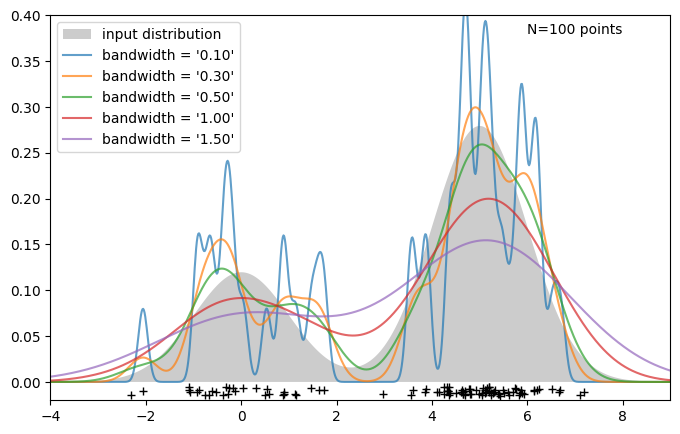

In [2]:
def visualize_kde():
    %matplotlib inline
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    from sklearn.neighbors import KernelDensity

    N = 100
    np.random.seed(1)
    X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                        np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

    indices = list(range(N))
    np.random.shuffle(indices)
    X_train = X[indices[:N//2]]
    X_test = X[indices[N//2:]]

    X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

    true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
                 + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
            label='input distribution')

    for bandwidth in [0.1, 0.3, 0.5, 1., 1.5]:
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X_train)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-', alpha=0.7,
                label="bandwidth = '{:.2f}'".format(bandwidth))


    ax.text(6, 0.38, "N={0} points".format(N))

    ax.legend(loc='upper left')
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-4, 9)
    ax.set_ylim(-0.02, 0.4)
    plt.show()
    
visualize_kde()

* my best bandwith is 0.5, from the plot, I think it does make sense, because the green line smooth and keep and show the original data in the best way (in all these bandwidths).

### Question 2 (25 points)

Consider the set of training data below, and two clustering algorithms: K-Means for K = 2, and a Gaussian Mixture Model (GMM) with 2 centers. Will these two clustering algorithms produce the same cluster centers (means) for this data set? In one sentence, explain why or why not.

In general, for any K, how is the way K-Means determines cluster centers different from the way GMM determines cluster centers?

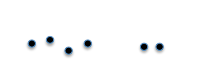

* Type your answer here:
* K-Means and GMM will not produce the same cluster centers, because GMM will consider the probabilistic cluster assignment, and GMM takes into account the mean as well as the (co)variance of the data (k-means only considers the mean to update the centroid). 
* ref: 
* https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
* https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/



### Question 3 (25 points)

Create an elbow plot for the breast cancer dataset and report the best value of for k according to the plot. Generate the plot for values of k from 1 to 8.


Best value for k: 2 (according to the plot)


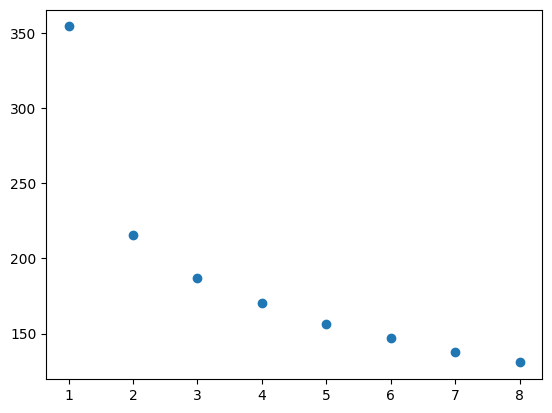

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


X_cancer, y_cancer = load_breast_cancer(return_X_y = True)
cancer_scaled = MinMaxScaler().fit_transform(X_cancer)

scores = []
for k in range(1, 9):

    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cancer_scaled)
    scores.append(-kmeans.score(cancer_scaled)) # respect Scikit-Learn’s “greater is better” rule, so "-"
    
plt.scatter(list(range(1, 9)), scores)
# plt.scatter(list(range(1, 8)), scores) 

print('Best value for k: 2 (according to the plot)')

### Question 4 (25 points)

What has a bigger impact on the result of density estimation: the choice of kernel or the choice of bandwidth? Explain your answer.

Type your answer here:
* Compared to the choice of kernel, the choice of bandwidth has a greater impact on the result of density estimation. 
* Given a kernel, a smaller bandwidth tends to lead to an undersmoothed density estimate that may contain many spurious noises (i.e., peaks and valleys), and a larger bandwidth tends to result in an oversmoothed density estimate that may hide some interesting underlying structure. 
* Therefore, choosing an optimal bandwidth for a dataset is important. 
* 
* ref:
* https://gistbok.ucgis.org/bok-topics/kernels-and-density-estimation#:~:text=Compared%20to%20the%20choice%20of,the%20result%20of%20density%20estimation.